# Mapping HERA's Primary Beam
## Tyler Cox

This notebook is being used to study the shape of HERA's primary beam, that is, the sensitivity of HERA as a function of angle from the zenith. We'll start by importing all of the necessary packages.

In [1]:
from astropy.io import fits
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from HERA_calibration_sources import add_fluxes
from pyuvdata import UVBeam
import healpy as hp


plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

Now, we need to pull in the data from the images that we've already generated. To do this, the glob package is used to search for all of the fits files we need to do the mapping. For now, we'll look at sources that we imaged in the 110-120 MHz range. Once glob collects the files, they are sorted, opened, and added to a list for later use

In [2]:
files = np.sort(glob('/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/*fits'))
HDUS = []
for f in files:
    HDUS.append(fits.open(f))

We then use the HERA_calibration_sources package to find bright sources within our field of view which we will track and use to 

In [3]:
tb = add_fluxes(RA_range=('00:00:00','13:00:00'),dec_range=1, min_flux=6)


Right ascension:
	Lower: 00h00m00s 
	Upper: 13h00m00s
Declination:
	Lower: -31.7214 degrees
	Upper: -29.7214 degrees
Minimum flux: 6 Jy
Number of regions found: 8

             Name of Center          RA        Dec  Total flux in region
0  TGSSADR J020012.1-305327   30.050440 -30.891060          25311.699249
1  TGSSADR J043300.3-295615   68.251488 -29.937559          10452.800014
2  TGSSADR J043736.5-295406   69.402321 -29.901720           9057.500076
3  TGSSADR J045826.4-300720   74.610413 -30.122379          19984.100246
4  TGSSADR J045514.2-300650   73.809464 -30.113991          23645.400387
5  TGSSADR J051330.6-303042   78.377602 -30.511909          18364.499821
6  TGSSADR J073819.7-302505  114.582474 -30.418230          14347.499702
7  TGSSADR J082126.4-301105  125.360031 -30.184980          20358.700781


In [4]:
plot_data = {v['Name of Center']: {'RA_diff': [], 'Flux': [], 'time': [],'Pixel_x': [],'Pixel_y': []} for _,v in tb.iterrows()}
source_info = {v['Name of Center']: {'RA': v['RA'], 'DEC': v['Dec'], 
                                     'Total_Flux': v['Total flux in region']} 
                                     for _,v in tb.iterrows()}

In [5]:
err = 3

f_count = len(files)
t = 0.0

c_prev = 0

for HDU,f in zip(HDUS,files):
    print ('Processing: ', f)
    # Read in file information
    fits_info = HDU[0].header
    ax1        = fits_info['NAXIS1']
    ax2        = fits_info['NAXIS2']
    units      = fits_info['BUNIT']
    c_ra       = fits_info['OBSRA']
    c_dec      = fits_info['OBSDEC']
    pix_size   = fits_info['CDELT2']
    c_pix1     = fits_info['CRPIX1']
    c_pix2     = fits_info['CRPIX2']
    
    data = HDU[0].data
    data = np.flip(data[0][0],axis=0)
    
    w = WCS(f)
    l_bound = w.all_pix2world(c_pix1,0,0,0,0)[0]
    r_bound = w.all_pix2world(c_pix1,ax2,0,0,0)[0]
    
    t += 1.0

    for _,src in tb.iterrows():
        # Convert a position to pixel values
        i,j = w.all_world2pix(src['RA'],src['Dec'],0,0,0)[:2]
        try:
            i = int(i)
            j = int(ax2-j)
        except:
            pass
        
        if (ax1-err > i > err) and (ax2-err > j > err):
            plot_data[src['Name of Center']]['Flux'].append(np.abs(data[j-err:j+err,i-err:i+err]).sum()/src['Total flux in region'])
            #plot_data[src['Name of Center']]['Flux'].append(np.abs(data[j-err:j+err,i-err:i+err].max()))
            ra_diff = c_ra-src['RA']
            
            # Correct for the difference in c_ra error
            if ra_diff > 30:
                ra_diff -= 360
            if ra_diff < -30:
                ra_diff += 360
                
            t = c_ra
                
            if c_ra-c_prev < -30:
                t = c_ra+360
            plot_data[src['Name of Center']]['RA_diff'].append(ra_diff)
            plot_data[src['Name of Center']]['time'].append(t)
            plot_data[src['Name of Center']]['Pixel_x'].append(j)
            plot_data[src['Name of Center']]['Pixel_y'].append(i)
    c_prev = c_ra

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.28211.uvOCRSL.uvfits.msFinal.combined.img.fits')


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.28360.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.28509.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.28658.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.28807.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.28956.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.29105.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.29255.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.g

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.37606.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.37755.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.37904.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.38053.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.38202.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.38352.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.38501.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.g

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47001.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47150.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47299.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47449.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47598.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47747.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.47896.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.g

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.56247.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.56396.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.56546.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.56695.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.56844.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.56993.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.57142.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.g

('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.65792.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.65941.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.66090.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.66239.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.66388.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.66537.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.grp1.of1.xx.LST.66686.uvOCRSL.uvfits.msFinal.combined.img.fits')
('Processing: ', '/data6/HERA/HERA_imaging/IDR2/110-120MHz/imgs/zen.g

In [6]:
for k,v in plot_data.iteritems():
    print (len(v['Flux']))

77
78
77
77
77
53
77
77


In [7]:
cleaned_set = {k: v for k,v in plot_data.iteritems() if len(v['Flux']) >= 74 }
len(cleaned_set)

7

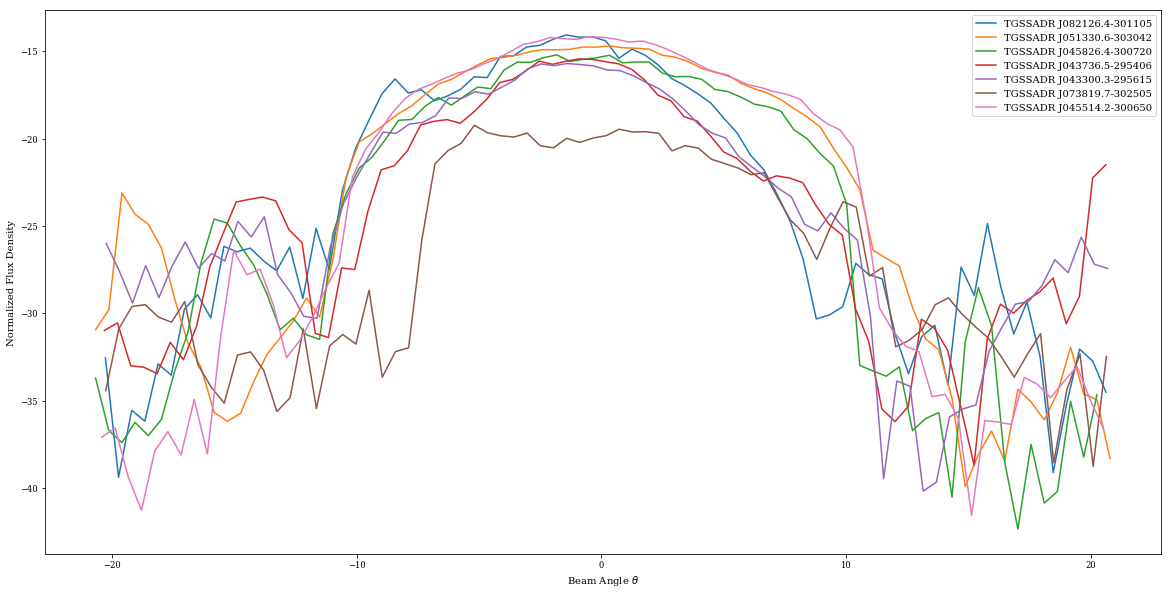

In [8]:
plt.figure(figsize=(20,10))

for key,item in cleaned_set.items():
    theta = item['RA_diff']
    flux = np.array(item['Flux'])
    plt.xlabel(r'Beam Angle $\theta$')
    plt.ylabel(r'Normalized Flux Density')
    #plt.title(key)
    plt.plot(theta,10*np.log10(flux),label=key)
plt.legend()
plt.show()

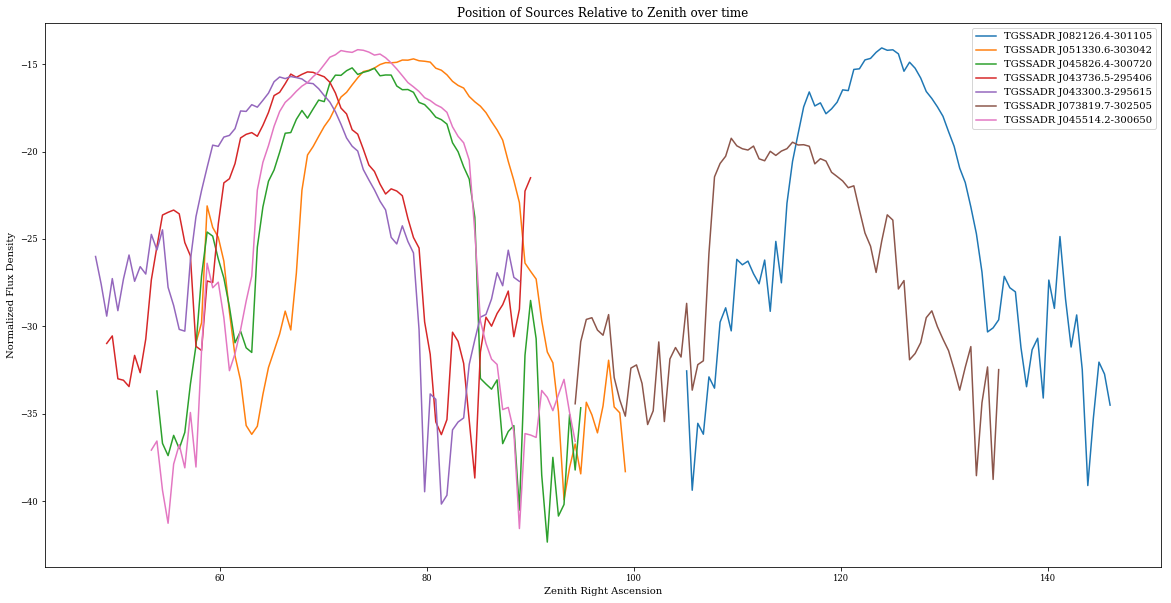

In [9]:
plt.figure(figsize=(20,10))

for key,item in cleaned_set.items():
    theta = item['time']
    flux = np.array(item['Flux'])
    plt.xlabel(r'Zenith Right Ascension')
    plt.ylabel('Normalized Flux Density')
    plt.plot(theta,10*np.log10(flux),label=key)
    
plt.title('Position of Sources Relative to Zenith over time')
plt.legend()
plt.show()

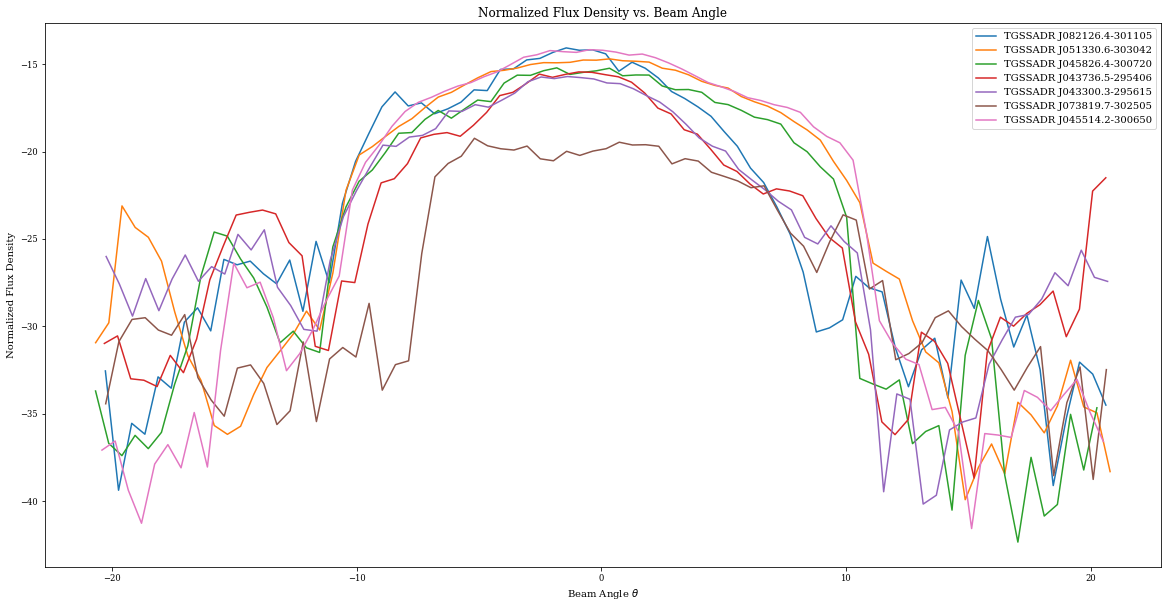

In [10]:
plt.figure(figsize=(20,10))

for key,item in cleaned_set.items():
    theta = item['RA_diff']
    flux = np.array(item['Flux'])
    plt.xlabel(r'Beam Angle $\theta$')
    plt.ylabel('Normalized Flux Density')
    plt.plot(theta,10*np.log10(flux),label=key)
    
plt.title('Normalized Flux Density vs. Beam Angle')
plt.legend()
plt.show()

In [11]:
for key,item in cleaned_set.items():
    print len(item['Flux'])

77
78
77
77
77
77
77


<Figure size 720x360 with 0 Axes>

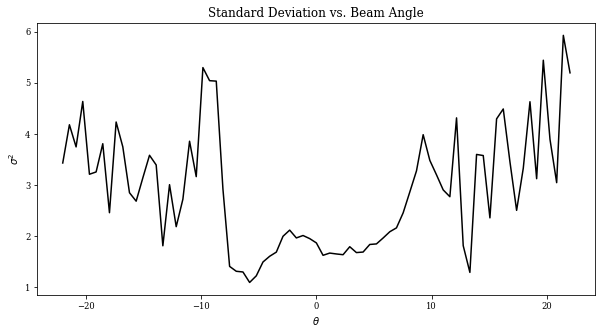

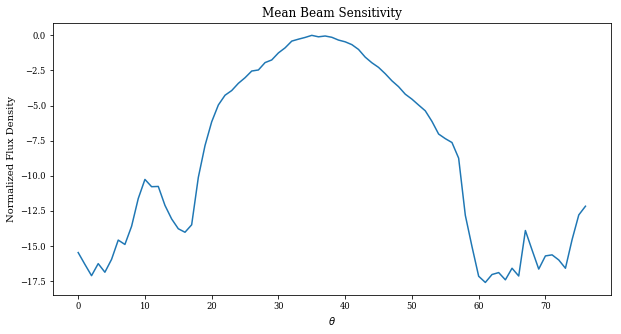

In [12]:
n = 77
l = np.zeros(n)
plt.figure(figsize=(10,5))

c = 0

for key,item in cleaned_set.items():
    theta = item['RA_diff']
    flux = np.array(item['Flux'])
    if len(flux) == n:
        l += flux
        c += 1

l /= c
l /= l.max()
l = 10*np.log10(l)

f = np.vstack([10*np.log10(item['Flux']) for key,item in cleaned_set.items() if len(item['Flux'])==n])

std = [np.std(f[:,i]) for i in range(f.shape[1])]

plt.figure(figsize=(10,5))

plt.plot(np.linspace(-22,22,len(std)),std,'k')
plt.title(r'Standard Deviation vs. Beam Angle')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\sigma^2$')
       

plt.figure(figsize=(10,5))

plt.xlabel(r'$\theta$')
plt.ylabel('Normalized Flux Density')
plt.title('Mean Beam Sensitivity')
plt.plot(np.arange(l.size),l)
plt.show()

In [13]:
hera_beam = UVBeam() #Instantiating HERA's beam as a UVBeam object
hera_beam.read_beamfits("NF_HERA_power_beam_healpix.fits") #Reading in the beam model
nside = hera_beam.nside #Setting the nside variable to be used in plotting

0.0


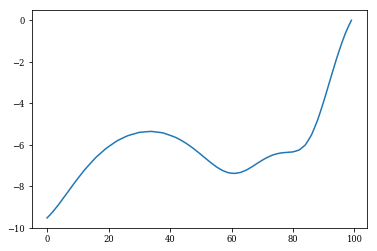

In [41]:
def beam_factor_2D(ra, hera_zen_ra, freq):
    """
    Outputs the beam factor of an objects's specified RA and Dec.
    Args:
    'ra'          : Object's Right Ascension in degrees
    'dec'         : Object's Declination in degrees
    'hera_zen_ra' : HERA's Zenith Right Ascension for the specific JDate in degrees
    'freq'        : The frequency we want to analyze (interger)
    """
    hera_ra    = ra                                    #RA as seen by HERA
    rel_dec    = 0          #Finding relative Dec at HERA
    rel_ra     = hera_ra - hera_zen_ra         #Finding relative RA at HERA
    np_dec     = 90.0 - np.abs(rel_dec)                #Finding corresponding North Pole Dec
    np_ra      = rel_ra                                #Finding corresponding North Pole RA
    
    freq           = freq - 100                           #Changing the freq to array element
    beam_map       = hera_beam.data_array[0][0][0][freq]  #Selecting specified frequency
    beam_map_norm  = beam_map/np.max(beam_map)            #Normalizing values of beam model
    
    #Finding pixel value @ specified coords.
    return hp.get_interp_val(beam_map_norm,np_ra,np_dec, lonlat=True)

beam_map = hera_beam.data_array[0][0][0][10]
beam_map_norm = beam_map/beam_map.max()
np_dec = np.deg2rad(0)

blah = []

print np_dec

for i in np.linspace(25,65,100):
    blah.append(hp.get_interp_val(beam_map_norm, np_dec, i, lonlat=True))

blah /= max(blah)
plt.plot(10*np.log10(blah))
plt.show()

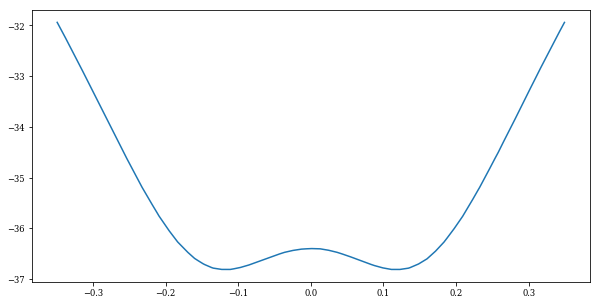

In [15]:
hera_dec = np.deg2rad(0)

diff = np.deg2rad(20)

n = 300

source_pos = np.linspace(hera_dec-diff,hera_dec+diff,n)

freqs = np.arange(150,151)

freq_beam = np.zeros(n)
beam_map_norm = beam_map/beam_map.max()
np_dec = np.deg2rad(69)

for j,freq in enumerate(freqs):
    temp = np.zeros(n)
    store = []
    for i in source_pos:
        store.append(hp.get_interp_val(beam_map_norm, np_dec, i, lonlat=False))  
    freq_beam += np.array(store)

freq_beam /= freqs.shape[0]
plt.figure(figsize=(10,5))
plt.plot(source_pos,10*np.log10(freq_beam))
plt.show()

In [27]:
hera_dec = -30.72152612068925

diff = 22

source_pos = np.linspace(hera_dec-diff,hera_dec+diff,100)

freqs = np.arange(110,120)

freq_beam = np.zeros(100)

for j,freq in enumerate(freqs):
    temp = np.zeros(100)
    store = []
    for i in source_pos:
        store.append(beam_factor_2D(0, i, 0, freq))  
    freq_beam += np.array(store)

freq_beam /= freqs.shape[0]
plt.figure(figsize=(10,5))
plt.plot(source_pos-hera_dec,10*np.log10(freq_beam))
plt.show()

TypeError: beam_factor_2D() takes exactly 3 arguments (4 given)

77 77


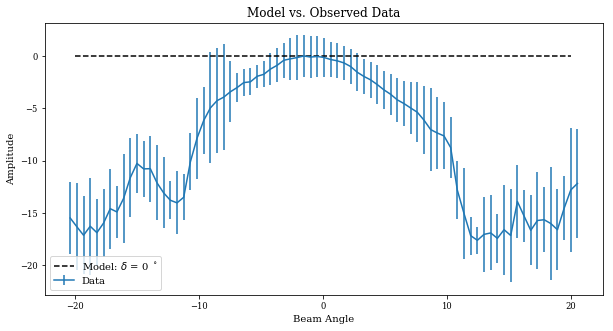

In [29]:
plt.rc('font', family='serif')
plt.figure(figsize=(10,5))
plt.title('Model vs. Observed Data')
plt.xlabel('Beam Angle')
plt.ylabel('Amplitude')

print len(theta), len(l)


plt.plot(np.linspace(-20,20,100),10*np.log10(blah),'k--',label=(r'Model: $\delta$ = 0 $^\circ$'))
plt.errorbar(theta,l,yerr=std,label='Data')
plt.legend()
plt.show()

In [ ]:
plt.rc('font', family='serif')
plt.figure(figsize=(10,5))
plt.title('Model vs. Observed Data')
plt.xlabel('Beam Angle')
plt.ylabel('Amplitude')

print len(theta), len(l)

plt.plot(source_pos-hera_dec,10*np.log10(freq_beam),'k--',label=(r'Model: $\delta$ = 0 $^\circ$'))
plt.errorbar(theta,l,yerr=std,label='Data')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
tot = np.array([])

for key,item in plot_data.items():
    theta = item['RA_diff']
    flux = np.array(item['Flux'])
    pix_x = np.array(item['Pixel_x'])
    pix_y = np.array(item['Pixel_y'])
    pix_x = source_info[key]['DEC']*np.ones(flux.shape[0])
    if pix_x.shape[0] != 0:
        scaled_flux = 10*np.log10(flux/flux.max())
        plt.scatter(theta,pix_x,c=scaled_flux,s=5)
        norm_flux = flux/flux.max()
        tot = np.hstack([tot,norm_flux])

plt.ylabel(r'Declination')
plt.xlabel(r'Beam Angle $\theta$')
plt.colorbar()
plt.xlim(-22,22)
plt.ylim(-22-30.7,-30.7+22)
plt.show()

The plot above is scaled incorrectly. When the colorbar was added it is scaled to the final source that is plotted. The next cell fixes this problem

In [ ]:
import ECHO

In [ ]:
ang_ra = np.array([])
fluxes = np.array([])
ang_dec = np.array([])


for key,item in plot_data.items():
    theta = np.array(item['RA_diff'])
    flux = np.array(item['Flux'])
    pix_x = np.array(item['Pixel_x'])
    pix_y = np.array(item['Pixel_y'])
    pix_x = source_info[key]['DEC']*np.ones(flux.shape[0])
    if pix_x.shape[0] != 0:
        ang_ra = np.concatenate([ang_ra,theta])
        fluxes = np.concatenate([fluxes,flux/flux.max()])
        ang_dec = np.concatenate([ang_dec,pix_x])

plt.figure(figsize=(7,7))
plt.scatter(ang_ra,ang_dec,c=10*np.log10(fluxes),s=5)
plt.ylabel(r'Declination')
plt.xlabel(r'Beam Angle $\theta$')
plt.xlim(-22,22)
plt.ylim(-22-30.7,-30.7+22)
plt.colorbar()
plt.show()

In [ ]:
grid, bins, rmsBins, _, xi, yi, gcounts, grms = ECHO.plot_utils.grid_data(ang_ra,ang_dec,10*np.log10(fluxes),binsize=0.5)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.flip(rmsBins,axis=0))
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.flip(grid.data,axis=0))
plt.colorbar()
plt.show()

In [ ]:
beam, rms, counts = ECHO.plot_utils.grid_to_healpix(xi,yi,alts=np.zeros_like(xi),rx=grid.data,lat0=-30,lon0=0,nside=32)

In [ ]:
hp.mollzoom(beam)

In [ ]:
fits.getdata(filename).shape